# Song Ranking Predictor In Spotify

Martin Hristev

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

try:
    df = pd.read_csv('./raw_data/universal_top_spotify_songs.csv')
except Exception as e:
    print("An error occurred while reading the CSV file:", e)
    df = None 

df.head()

,spotify_id,name,artists,daily_rank,daily_movement,weekly_movement,country,snapshot_date,popularity,is_explicit,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,6tNQ70jh4OwmPGpYy6R2o9,Beautiful Things,Benson Boone,1,0,0,NaN,2024-03-09,100,False,...,10,-5.692,1,0.0603,0.1510,0.000000,0.1400,0.219,105.029,3
1,3w0w2T288dec0mgeZZqoNN,CARNIVAL,"¥$, Kanye West, Ty Dolla $ign, Rich The Kid, P...",2,0,0,NaN,2024-03-09,96,True,...,1,-5.746,1,0.1590,0.1890,0.000000,0.3390,0.311,148.144,4
2,3qhlB30KknSejmIvZZLjOD,End of Beginning,Djo,3,0,1,NaN,2024-03-09,94,False,...,2,-7.643,1,0.0584,0.0351,0.002590,0.0707,0.912,159.982,4
3,3rUGC1vUpkDG9CZFHMur1t,greedy,Tate McRae,4,0,1,NaN,2024-03-09,98,True,...,6,-3.180,0,0.0319,0.2560,0.000000,0.1140,0.844,111.018,1
4,17phhZDn6oGtzMe56NuWvj,Lose Control,Teddy Swims,5,1,2,NaN,2024-03-09,94,False,...,9,-4.409,1,0.0337,0.1990,0.000019,0.1040,0.242,159.920,3


Show basic info and description of the dataset

In [2]:
df.shape

(525027, 25)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525027 entries, 0 to 525026
Data columns (total 25 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   spotify_id          525027 non-null  object 
 1   name                525004 non-null  object 
 2   artists             525004 non-null  object 
 3   daily_rank          525027 non-null  int64  
 4   daily_movement      525027 non-null  int64  
 5   weekly_movement     525027 non-null  int64  
 6   country             517871 non-null  object 
 7   snapshot_date       525027 non-null  object 
 8   popularity          525027 non-null  int64  
 9   is_explicit         525027 non-null  bool   
 10  duration_ms         525027 non-null  int64  
 11  album_name          524832 non-null  object 
 12  album_release_date  524832 non-null  object 
 13  danceability        525027 non-null  float64
 14  energy              525027 non-null  float64
 15  key                 525027 non-nul

Because the project will work with the Global Spotify ranking, we need to remove all the records that are for specific country.

In [4]:
df = df[df['country'].isna()]
df.shape

(7156, 25)

In [5]:
df.sample(5)

,spotify_id,name,artists,daily_rank,daily_movement,weekly_movement,country,snapshot_date,popularity,is_explicit,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
229924,0QZ5yyl6B6utIWkxeBDxQN,The Night We Met,Lord Huron,42,-3,-7,NaN,2024-01-06,82,False,...,2,-9.510,1,0.0378,0.9690,0.267000,0.6410,0.100,86.997,3
350303,1BxfuPKGuaTgP7aM0Bbdwr,Cruel Summer,Taylor Swift,10,-4,-2,NaN,2023-12-04,99,False,...,9,-5.707,1,0.1570,0.1170,0.000021,0.1050,0.564,169.994,4
73004,7DSAEUvxU8FajXtRloy8M0,Flowers,Miley Cyrus,18,-1,-6,NaN,2024-02-18,95,False,...,0,-4.775,1,0.0633,0.0584,0.000070,0.0232,0.632,118.048,4
29202,3qhlB30KknSejmIvZZLjOD,End of Beginning,Djo,7,2,11,NaN,2024-03-01,90,False,...,2,-7.643,1,0.0584,0.0351,0.002590,0.0707,0.912,159.982,4
317492,2QjOHCTQ1Jl3zawyYOpxh6,Sweater Weather,The Neighbourhood,49,1,-1,NaN,2023-12-13,93,False,...,10,-2.810,1,0.0336,0.0495,0.017700,0.1010,0.398,124.053,4


In [6]:
df.describe()

,daily_rank,daily_movement,weekly_movement,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,7156.000000,7156.000000,7156.000000,7156.000000,7156.000000,7156.000000,7156.000000,7156.000000,7156.000000,7156.000000,7156.000000,7156.000000,7156.000000,7156.000000,7156.000000,7156.000000,7156.000000
mean,25.506847,0.911124,3.855366,90.910844,195735.731135,0.659412,0.636210,5.205003,-6.645669,0.619620,0.083862,0.286414,0.011542,0.180832,0.519795,121.610038,3.835383
std,14.436089,7.311091,13.051943,10.565341,39747.996343,0.143933,0.171135,3.553490,2.901683,0.485514,0.080009,0.287962,0.046621,0.132441,0.247610,30.035600,0.509049
min,1.000000,-32.000000,-48.000000,0.000000,63415.000000,0.234000,0.091100,0.000000,-17.828000,0.000000,0.025600,0.000375,0.000000,0.023200,0.043200,67.196000,1.000000
25%,13.000000,-1.000000,-3.000000,89.000000,172264.000000,0.537000,0.532000,2.000000,-7.779000,0.000000,0.037500,0.056900,0.000000,0.098000,0.345000,100.011000,4.000000
50%,26.000000,0.000000,1.000000,93.000000,196800.000000,0.668000,0.678000,5.000000,-6.247000,1.000000,0.055700,0.177000,0.000002,0.130000,0.486000,117.913000,4.000000
75%,38.000000,2.000000,7.000000,95.000000,222369.000000,0.774000,0.742000,8.000000,-4.863000,1.000000,0.094600,0.446000,0.000123,0.219000,0.726000,140.061000,4.000000
max,50.000000,49.000000,49.000000,100.000000,379058.000000,0.943000,0.965000,11.000000,-1.924000,1.000000,0.645000,0.969000,0.798000,0.890000,0.976000,202.899000,5.000000


Check for NULL values

In [7]:
df.isna().sum()

spotify_id               0
name                     0
artists                  0
daily_rank               0
daily_movement           0
weekly_movement          0
country               7156
snapshot_date            0
popularity               0
is_explicit              0
duration_ms              0
album_name               3
album_release_date       3
danceability             0
energy                   0
key                      0
loudness                 0
mode                     0
speechiness              0
acousticness             0
instrumentalness         0
liveness                 0
valence                  0
tempo                    0
time_signature           0
dtype: int64

Check for those null values in album section

In [8]:
df[df['album_name'].isnull()]

,spotify_id,name,artists,daily_rank,daily_movement,weekly_movement,country,snapshot_date,popularity,is_explicit,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
266368,4HEOgBHRCExyYVeTyrXsnL,Jingle Bells - Remastered 1999,Frank Sinatra,25,3,25,NaN,2023-12-27,88,False,...,8,-13.119,1,0.0498,0.727,0.0,0.0977,0.951,174.609,4
270021,4HEOgBHRCExyYVeTyrXsnL,Jingle Bells - Remastered 1999,Frank Sinatra,28,7,22,NaN,2023-12-26,88,False,...,8,-13.119,1,0.0498,0.727,0.0,0.0977,0.951,174.609,4
273678,4HEOgBHRCExyYVeTyrXsnL,Jingle Bells - Remastered 1999,Frank Sinatra,35,15,15,NaN,2023-12-25,88,False,...,8,-13.119,1,0.0498,0.727,0.0,0.0977,0.951,174.609,4


We can easily google and fill in the missing values, so we don't lose any data.

In [9]:
df['album_name'] = df['album_name'].fillna('A Jolly Christmas From Frank Sinatra')
df['album_release_date'] = df['album_release_date'].fillna('1957-09-21')

Confirm that all null values are fixed.

In [10]:
df.isna().sum()

spotify_id               0
name                     0
artists                  0
daily_rank               0
daily_movement           0
weekly_movement          0
country               7156
snapshot_date            0
popularity               0
is_explicit              0
duration_ms              0
album_name               0
album_release_date       0
danceability             0
energy                   0
key                      0
loudness                 0
mode                     0
speechiness              0
acousticness             0
instrumentalness         0
liveness                 0
valence                  0
tempo                    0
time_signature           0
dtype: int64

Check for duplicates

In [11]:
df[df.duplicated()].sum()

spotify_id              0
name                    0
artists                 0
daily_rank              0
daily_movement          0
weekly_movement         0
country                 0
snapshot_date           0
popularity              0
is_explicit             0
duration_ms             0
album_name              0
album_release_date      0
danceability          0.0
energy                0.0
key                     0
loudness              0.0
mode                    0
speechiness           0.0
acousticness          0.0
instrumentalness      0.0
liveness              0.0
valence               0.0
tempo                 0.0
time_signature          0
dtype: object

Replace True and False in the 'is_explicit' column with 1 and 0 values

In [12]:
df['is_explicit'] = df['is_explicit'].map({True: 1, False: 0})

Make the dates to be datetime so it's easier to work with

In [13]:
df['album_release_date'] = pd.to_datetime(df['album_release_date'])
df['snapshot_date'] = pd.to_datetime(df['snapshot_date'])

Create column for "days since release" and release year

In [14]:
df['release_year'] = df['album_release_date'].dt.year
df['days_since_release'] = (df['snapshot_date'] - df['album_release_date']).dt.days


Convert the duration from milliseconds to minutes for the duration of a song.

In [15]:
df['duration_min']= round(df['duration_ms'] / (1000*60), 2)

Get only the highest rank for each song, because the we want the model to predict the highest possible rank that song can achieve.

In [16]:
idx = df.groupby("spotify_id")['daily_rank'].idxmin()

df = df.loc[idx]
num_duplicated = df['spotify_id'].duplicated().sum()
print(num_duplicated)
df.shape

0


(272, 28)

Drop irrelevant columns.

In [17]:
df.drop(labels=["spotify_id", 
                "artists", 
                "name", 
                "country", 
                "daily_movement",
                "weekly_movement",
                "country",
                "album_name",
                "duration_ms",
                "album_release_date",
                ], axis=1, inplace=True)


Heatmap

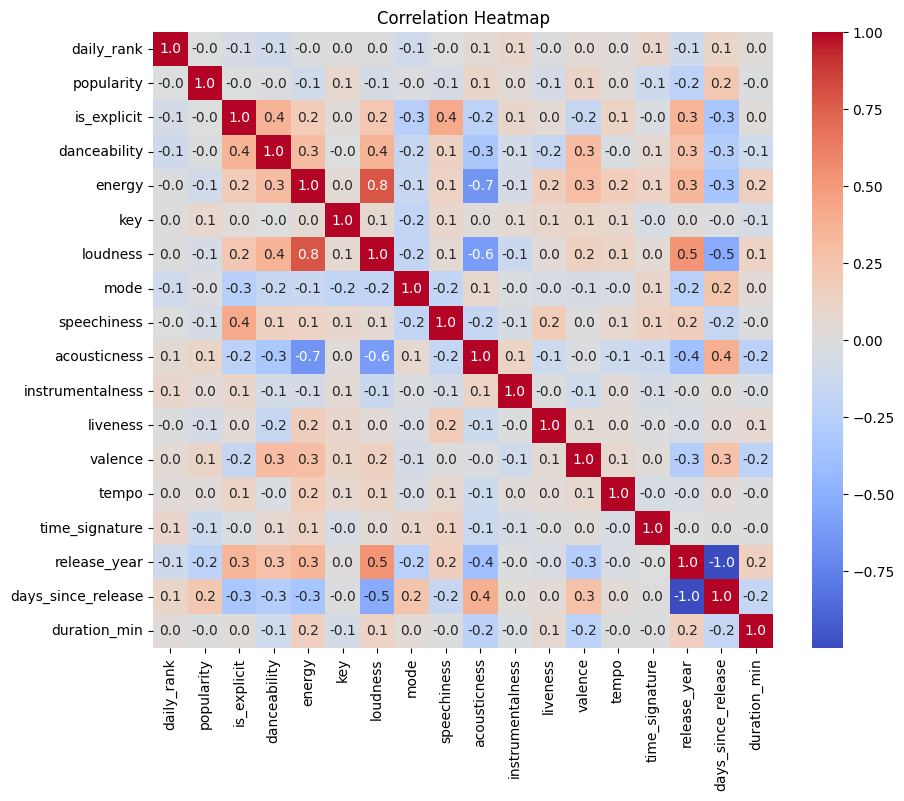

In [18]:
correlations = df.corr(numeric_only=True)
plt.figure(figsize=(10, 8))
sns.heatmap(correlations, annot=True, cmap='coolwarm', fmt=".1f")
plt.title('Correlation Heatmap')
plt.show()

Find best correlations

In [19]:
correlation_with_daily_rank = correlations['daily_rank'].sort_values(ascending=False)
print(correlation_with_daily_rank)

daily_rank            1.000000
days_since_release    0.105981
time_signature        0.100624
instrumentalness      0.088038
acousticness          0.053902
valence               0.043254
duration_min          0.030549
tempo                 0.027341
key                   0.015177
loudness              0.000770
speechiness          -0.003547
popularity           -0.005971
energy               -0.010954
liveness             -0.013869
is_explicit          -0.062923
mode                 -0.100457
release_year         -0.105362
danceability         -0.108565
Name: daily_rank, dtype: float64


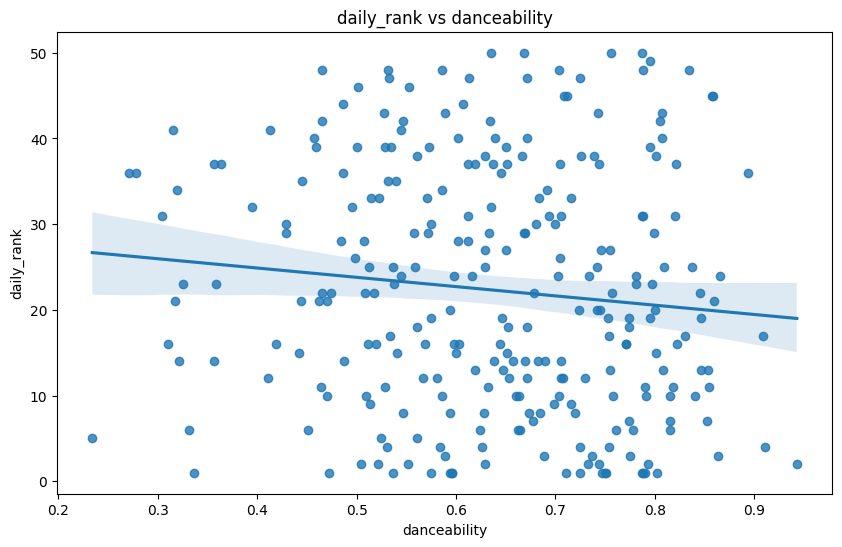

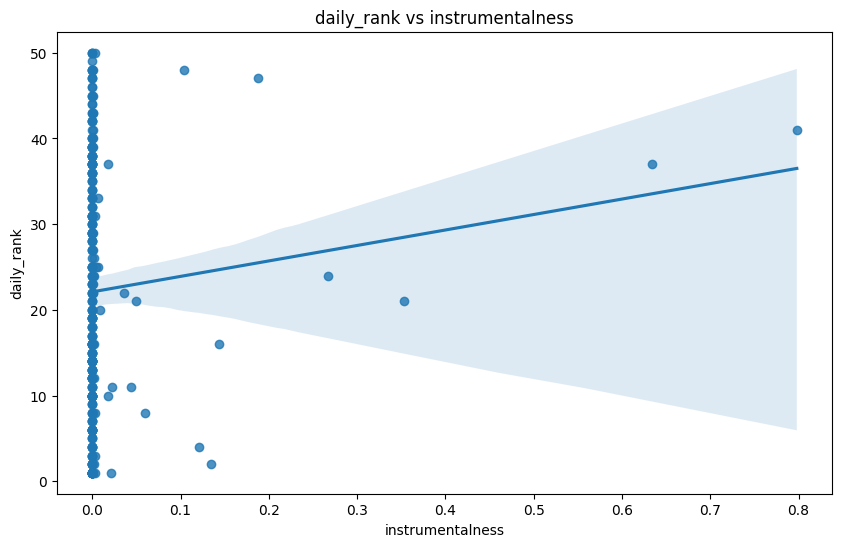

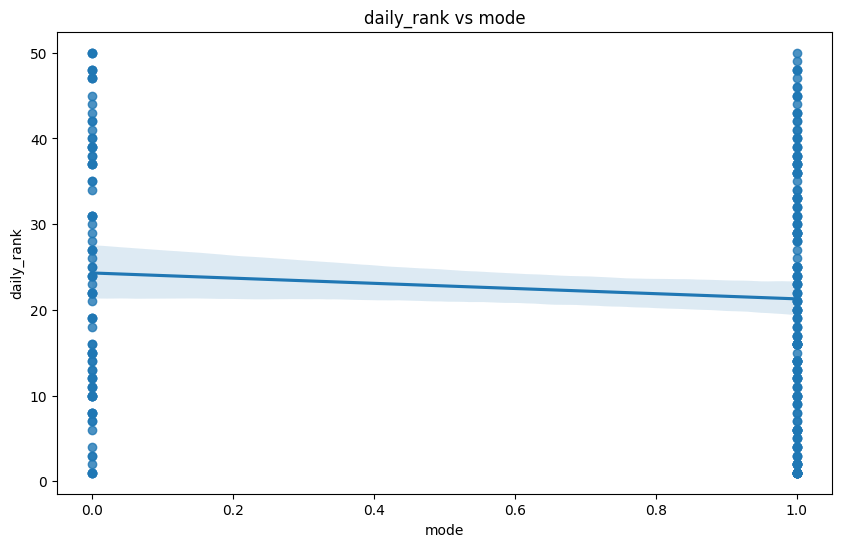

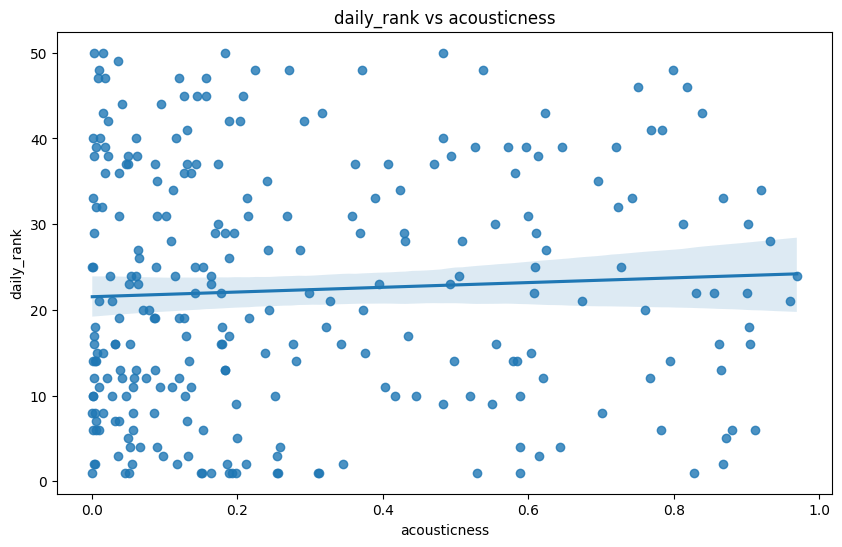

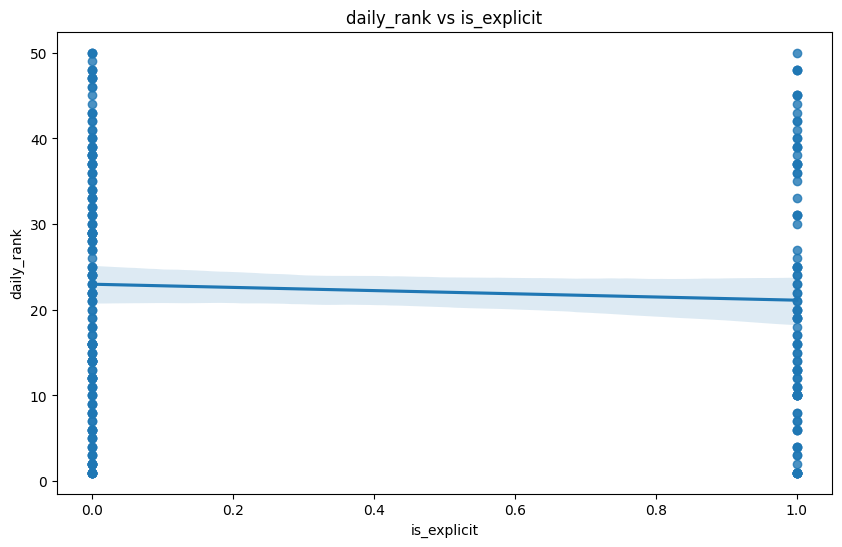

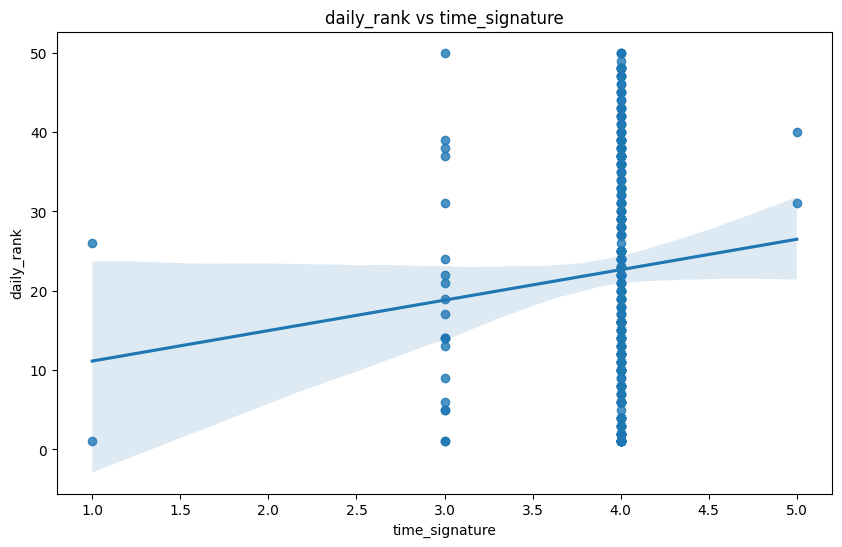

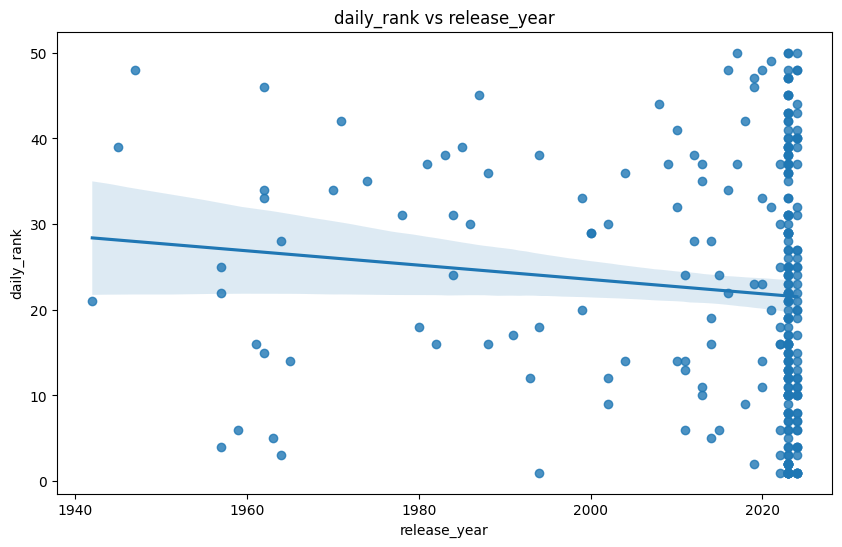

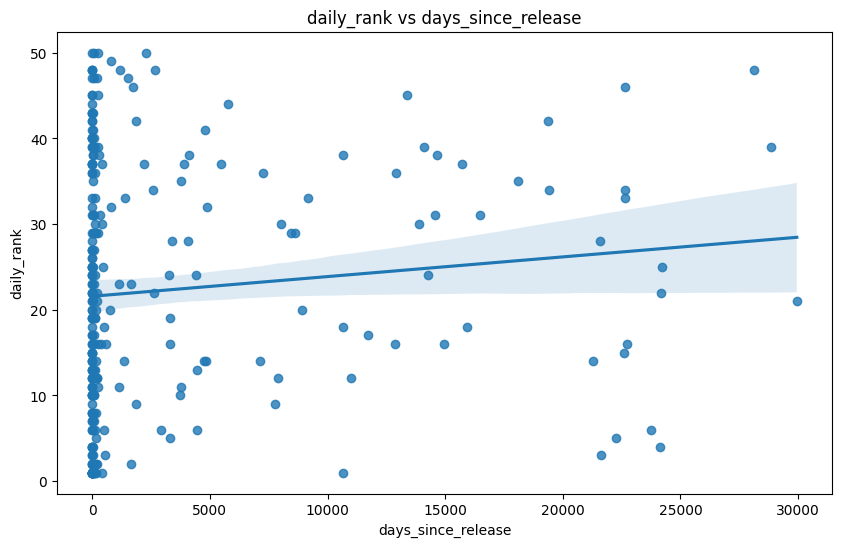

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define features
features = ['danceability', 'instrumentalness', 'mode', 'acousticness', 'is_explicit', 'time_signature', 'release_year', 'days_since_release']

# Create scatter plots for each feature
for feature in features:
    plt.figure(figsize=(10, 6))
    sns.regplot(x=df[feature], y=df['daily_rank'], data=df, scatter=True, fit_reg=True)
    plt.xlabel(feature)
    plt.ylabel('daily_rank')
    plt.title(f'daily_rank vs {feature}')
    plt.show()

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import numpy as np
from sklearn.model_selection import cross_val_score

X = df[['danceability', 'mode', 'acousticness', 'is_explicit', 'time_signature']]
y = df['daily_rank']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = RandomForestRegressor(
                              n_estimators=38, 
                              random_state=42, 
                              max_features="sqrt", 
                              max_depth=10,
                              ccp_alpha=0.5
                              )
scores = cross_val_score(model, X, y, cv=5)
print("RMSE scores for each fold: ", np.sqrt(-scores))
mse_scores = -scores
print("Mean RMSE: ", (np.sqrt(mse_scores)).mean())

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

rmse = np.sqrt(mse)
print(f"Root Mean Squared Error: {rmse}")


RMSE scores for each fold:  [0.17075965 0.44898099 0.30127773 0.23953096 0.13789791]
Mean RMSE:  0.25968944566370744
Mean Squared Error: 140.69484419506176
Root Mean Squared Error: 11.861485749899199


In [22]:
#CARNIVAL
new_features = pd.DataFrame({
    'danceability': [0.594],
    'mode': [1],
    'acousticness': [0.189],
    'is_explicit': [1],
    'time_signature': [4]
})
predicted_rank = model.predict(new_features)

print(f"Predicted daily rank: {predicted_rank[0]}")

Predicted daily rank: 14.85473860934387


In [23]:
from itertools import combinations
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Define all possible features
features = ['danceability', 'instrumentalness', 'mode', 'acousticness', 'is_explicit', 'time_signature', 'release_year', 'days_since_release']

# Define target
target = 'daily_rank'

# Initialize the model
model = RandomForestRegressor(random_state=42)

# Store the best MSE and feature combination
best_mse = float('inf')
best_features = None

# Iterate over all combinations of at least 2 features
for r in range(1, len(features) + 1):
    for feature_combination in combinations(features, r):
        # Split data into training and testing sets
        X_train, X_test, y_train, y_test = train_test_split(df[list(feature_combination)], df[target], test_size=0.2, random_state=42)

        # Fit the model
        model.fit(X_train, y_train)

        # Make predictions
        y_pred = model.predict(X_test)

        # Calculate MSE
        mse = mean_squared_error(y_test, y_pred)

        # Update best MSE and feature combination
        if mse < best_mse:
            best_mse = mse
            best_features = feature_combination

print(f"Best MSE: {best_mse}")
print(f"Best feature combination: {best_features}")



Best MSE: 157.02224181818178
Best feature combination: ('danceability', 'acousticness', 'is_explicit', 'time_signature')


In [24]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import numpy as np
from sklearn.model_selection import cross_val_score

X = df[['danceability', 'acousticness', 'is_explicit', 'time_signature']]
y = df['daily_rank']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = RandomForestRegressor(
                              n_estimators=41, 
                              random_state=42, 
                              max_depth=22,
                              ccp_alpha=0.2,
                              min_impurity_decrease=0.1,
                              )
# 'friedman_mse', 'poisson', 'absolute_error', 'squared_error'
scores = cross_val_score(model, X, y, cv=5)
print("RMSE scores for each fold: ", np.sqrt(-scores))
mse_scores = -scores
print("Mean RMSE: ", (np.sqrt(mse_scores)).mean())

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

rmse = np.sqrt(mse)
print(f"Root Mean Squared Error: {rmse}")


RMSE scores for each fold:  [0.23223666 0.55443017 0.41755228 0.38159033 0.38444533]
Mean RMSE:  0.39405095433065307
Mean Squared Error: 150.29260227990227
Root Mean Squared Error: 12.259388332209005
